# Librerias

In [180]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Display pandas
from IPython.display import display, HTML

# Clustering jerarquico
from scipy.cluster.hierarchy import dendrogram, linkage

# Distancias

In [7]:
data = pd.read_csv("../datasets/movies/movies.csv", sep=";")
data

user_id  star_wars  lord_of_the_rings  harry_potter
0        1        1.2                4.9           2.1
1        2        2.1                8.1           7.9
2        3        7.4                3.0           9.9
3        4        5.6                0.5           1.8
4        5        1.5                8.3           2.6
5        6        2.5                3.7           6.5
6        7        2.0                8.2           8.5
7        8        1.8                9.3           4.5
8        9        2.6                1.7           3.1
9       10        1.5                4.7           2.3

In [8]:
data.shape

(10, 4)

In [9]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [10]:
dd1 = distance_matrix(data[movies], data[movies], p=1)
dd2 = distance_matrix(data[movies], data[movies], p=2)
dd10 = distance_matrix(data[movies], data[movies], p=10)

In [11]:
dd1

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [12]:
def dm_to_df(dd, col_name):
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [7]:
dm_to_df(dd1, data["user_id"])

user_id    1     2     3     4     5     6     7     8     9     10
user_id                                                            
1         0.0   9.9  15.9   9.1   4.2   6.9  10.5   7.4   5.6   0.7
2         9.9   0.0  12.4  17.2   6.1   6.2   0.8   4.9  11.7   9.6
3        15.9  12.4   0.0  12.4  18.5   9.0  12.0  17.3  12.9  15.2
4         9.1  17.2  12.4   0.0  12.7  11.0  18.0  15.3   5.5   8.8
5         4.2   6.1  18.5  12.7   0.0   9.5   6.5   3.2   8.2   3.9
6         6.9   6.2   9.0  11.0   9.5   0.0   7.0   8.3   5.5   6.2
7        10.5   0.8  12.0  18.0   6.5   7.0   0.0   5.3  12.5  10.2
8         7.4   4.9  17.3  15.3   3.2   8.3   5.3   0.0   9.8   7.1
9         5.6  11.7  12.9   5.5   8.2   5.5  12.5   9.8   0.0   4.9
10        0.7   9.6  15.2   8.8   3.9   6.2  10.2   7.1   4.9   0.0

In [8]:
dm_to_df(dd2, data["user_id"])

user_id         1          2          3          4          5         6   \
user_id                                                                    
1         0.000000   6.685058  10.143471   6.229767   3.449638  4.742362   
2         6.685058   0.000000   7.622336  10.354709   5.337602  4.634652   
3        10.143471   7.622336   0.000000   8.666026  10.779147  6.004998   
4         6.229767  10.354709   8.666026   0.000000   8.848164  6.476110   
5         3.449638   5.337602  10.779147   8.848164   0.000000  6.113101   
6         4.742362   4.634652   6.004998   6.476110   6.113101  0.000000   
7         7.244998   0.616441   7.626270  10.823123   5.921993  4.949747   
8         5.047772   3.618011  10.010494   9.958414   2.167948  5.987487   
9         3.633180   8.015610   8.424369   3.482815   6.709694  3.945884   
10        0.412311   6.578754   9.770363   5.890671   3.612478  4.431704   

user_id         7          8         9         10  
user_id                                            
1         7.244998   5.047772  3.633180  0.412311  
2         0.616441   3.618011  8.015610  6.578754  
3         7.626270  10.010494  8.424369  9.770363  
4        10.823123   9.958414  3.482815  5.890671  
5         5.921993   2.167948  6.709694  3.612478  
6         4.949747   5.987487  3.945884  4.431704  
7         0.000000   4.153312  8.471718  7.137226  
8         4.153312   0.000000  7.769170  5.107837  
9         8.471718   7.769170  0.000000  3.293934  
10        7.137226   5.107837  3.293934  0.000000

In [9]:
dm_to_df(dd10, data["user_id"])

user_id        1         2         3         4         5         6         7   \
user_id                                                                         
1        0.000000  5.801514  7.875189  4.715803  3.400000  4.400003  6.400850   
2        5.801514  0.000000  5.582463  7.680689  5.300000  4.400005  0.600000   
3        7.875189  5.582463  0.000000  8.100007  7.408914  4.912532  5.689450   
4        4.715803  7.680689  8.100007  0.000000  7.801255  4.717102  7.873307   
5        3.400000  5.300000  7.408914  7.801255  0.000000  4.681464  5.900000   
6        4.400003  4.400005  4.912532  4.717102  4.681464  0.000000  4.500135   
7        6.400850  0.600000  5.689450  7.873307  5.900000  4.500135  0.000000   
8        4.401025  3.400010  6.570254  8.800205  1.900310  5.600019  4.000001   
9        3.200085  6.435159  6.820602  3.000101  6.600000  3.401683  6.595259   
10       0.301025  5.603800  7.658364  4.450759  3.600000  4.200000  6.202035   

user_id        8         9         10  
user_id                                
1        4.401025  3.200085  0.301025  
2        3.400010  6.435159  5.603800  
3        6.570254  6.820602  7.658364  
4        8.800205  3.000101  4.450759  
5        1.900310  6.600000  3.600000  
6        5.600019  3.401683  4.200000  
7        4.000001  6.595259  6.202035  
8        0.000000  7.600000  4.600288  
9        7.600000  0.000000  3.000014  
10       4.600288  3.000014  0.000000

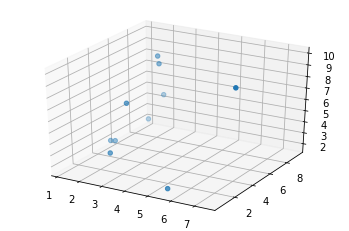

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=data["star_wars"], ys=data["lord_of_the_rings"], zs=data["harry_potter"])

# Enlaces

In [56]:
df = dm_to_df(dd1, data["user_id"])
df

user_id    1     2     3     4     5     6     7     8     9     10
user_id                                                            
1         0.0   9.9  15.9   9.1   4.2   6.9  10.5   7.4   5.6   0.7
2         9.9   0.0  12.4  17.2   6.1   6.2   0.8   4.9  11.7   9.6
3        15.9  12.4   0.0  12.4  18.5   9.0  12.0  17.3  12.9  15.2
4         9.1  17.2  12.4   0.0  12.7  11.0  18.0  15.3   5.5   8.8
5         4.2   6.1  18.5  12.7   0.0   9.5   6.5   3.2   8.2   3.9
6         6.9   6.2   9.0  11.0   9.5   0.0   7.0   8.3   5.5   6.2
7        10.5   0.8  12.0  18.0   6.5   7.0   0.0   5.3  12.5  10.2
8         7.4   4.9  17.3  15.3   3.2   8.3   5.3   0.0   9.8   7.1
9         5.6  11.7  12.9   5.5   8.2   5.5  12.5   9.8   0.0   4.9
10        0.7   9.6  15.2   8.8   3.9   6.2  10.2   7.1   4.9   0.0

In [175]:
def candidates(df):
    n_rows = df.shape[0]
    s_min_dist = np.zeros((n_rows,))
    s_min_idx = [[] for i in range(n_rows)]
    for i in range(n_rows):
        data_i = df.iloc[i,:].values
        data_i = np.where(data_i==0, 99,data_i)
        # Almacena distancia minima del registro ith
        s_min_dist[i] = np.min(data_i)
        print(s_min_dist[i])
        checkMe = data_i-s_min_dist[i]
        if(np.sum(checkMe<=0.001)>2):
            s_min_idx[i].extend([np.where(checkMe<=0.001 & ~checkMe[i])[0]])
        else:
            # Almacena index de distancia minima del registro ith, es decir, jth
            s_min_idx[i].append(np.argmin(data_i))
        print(s_min_idx[i])
    best_ith = np.argmin(s_min_dist)
    print(best_ith)
    res = []
    res.append(df.columns.values[best_ith])
    s_min_idx_jth = [df.columns.values[i] for i in s_min_idx[best_ith]]
    if(s_min_idx_jth[0].size>1):
        s_min_idx_jth = s_min_idx_jth[0].tolist()
    res.append(s_min_idx_jth)
    res.append(s_min_dist[best_ith])
    return res

In [176]:
def getNew_cluster(data1, data2):
    data3 = np.zeros((data1.shape[0]))
    for i in range(data1.shape[0]):
        data3[i] = min(data1[i], data2[i])
    return data3

In [177]:
def createNew_cls(df, datos1, datos2, name_cls):
    data3 = getNew_cluster(datos1, datos2)
    #replace row
    df.loc[name_cls,:]=0
    df.loc[name_cls,:]=data3
    #replace col
    df.loc[:,name_cls]=0
    df.loc[:,name_cls]=np.append(data3, [0])
    return df

In [178]:
def agglomerativeMethod(df, datos, name_cls):
    idx1, idxs2, min_dist = datos
    for i in range(len(idxs2)):
        datos1 = df.loc[idx1,:].values
        datos2 = df.loc[idxs2[i],:].values
        # Row & Col
        df = createNew_cls(df, datos1, datos2, name_cls)
        # drop cls
        df.drop([idxs2[i]], inplace=True)
        df.drop([idxs2[i]], axis=1, inplace=True)
    df.drop([idx1], inplace=True)
    df.drop([idx1], axis=1, inplace=True)
    return df

In [179]:
df = dm_to_df(dd1, data["user_id"])
print("Data Inicial")
display(df)
print("*"*60)
print('\n')
Z = []
i = 1
n = 1000
val = 11
# tengo que saber cuantos valores quedan en el df
while(n > 1):
    datos = candidates(df)
    Z.append(datos)
    print("datos candidatos: ", datos)
    df = agglomerativeMethod(df, datos, val)
    display(df)
    n = df.shape[0]
    val+=1
    print("-"*60)
    print('\n')

Data Inicial


user_id    1     2     3     4     5     6     7     8     9     10
user_id                                                            
1         0.0   9.9  15.9   9.1   4.2   6.9  10.5   7.4   5.6   0.7
2         9.9   0.0  12.4  17.2   6.1   6.2   0.8   4.9  11.7   9.6
3        15.9  12.4   0.0  12.4  18.5   9.0  12.0  17.3  12.9  15.2
4         9.1  17.2  12.4   0.0  12.7  11.0  18.0  15.3   5.5   8.8
5         4.2   6.1  18.5  12.7   0.0   9.5   6.5   3.2   8.2   3.9
6         6.9   6.2   9.0  11.0   9.5   0.0   7.0   8.3   5.5   6.2
7        10.5   0.8  12.0  18.0   6.5   7.0   0.0   5.3  12.5  10.2
8         7.4   4.9  17.3  15.3   3.2   8.3   5.3   0.0   9.8   7.1
9         5.6  11.7  12.9   5.5   8.2   5.5  12.5   9.8   0.0   4.9
10        0.7   9.6  15.2   8.8   3.9   6.2  10.2   7.1   4.9   0.0

************************************************************


0.7
[9]
0.7999999999999994
[6]
9.0
[5]
5.499999999999999
[8]
3.2
[7]
5.5
[8]
0.7999999999999994
[1]
3.2
[4]
4.9
[9]
0.7
[0]
0
datos candidatos:  [1, [10], 0.7]


user_id    2     3     4     5     6     7     8     9     11
user_id                                                      
2         0.0  12.4  17.2   6.1   6.2   0.8   4.9  11.7   9.6
3        12.4   0.0  12.4  18.5   9.0  12.0  17.3  12.9  15.2
4        17.2  12.4   0.0  12.7  11.0  18.0  15.3   5.5   8.8
5         6.1  18.5  12.7   0.0   9.5   6.5   3.2   8.2   3.9
6         6.2   9.0  11.0   9.5   0.0   7.0   8.3   5.5   6.2
7         0.8  12.0  18.0   6.5   7.0   0.0   5.3  12.5  10.2
8         4.9  17.3  15.3   3.2   8.3   5.3   0.0   9.8   7.1
9        11.7  12.9   5.5   8.2   5.5  12.5   9.8   0.0   4.9
11        9.6  15.2   8.8   3.9   6.2  10.2   7.1   4.9   0.0

------------------------------------------------------------


0.7999999999999994
[5]
9.0
[4]
5.499999999999999
[7]
3.2
[6]
5.5
[7]
0.7999999999999994
[0]
3.2
[3]
4.9
[8]
3.900000000000001
[3]
0
datos candidatos:  [2, [7], 0.7999999999999994]


user_id    3     4     5     6     8     9     11    12
user_id                                                
3         0.0  12.4  18.5   9.0  17.3  12.9  15.2  12.0
4        12.4   0.0  12.7  11.0  15.3   5.5   8.8  17.2
5        18.5  12.7   0.0   9.5   3.2   8.2   3.9   6.1
6         9.0  11.0   9.5   0.0   8.3   5.5   6.2   6.2
8        17.3  15.3   3.2   8.3   0.0   9.8   7.1   4.9
9        12.9   5.5   8.2   5.5   9.8   0.0   4.9  11.7
11       15.2   8.8   3.9   6.2   7.1   4.9   0.0   9.6
12       12.0  17.2   6.1   6.2   4.9  11.7   9.6   0.0

------------------------------------------------------------


9.0
[3]
5.499999999999999
[5]
3.2
[4]
5.5
[5]
3.2
[2]
4.9
[6]
3.900000000000001
[2]
4.900000000000001
[4]
2
datos candidatos:  [5, [8], 3.2]


user_id    3     4     6     9     11    12    13
user_id                                          
3         0.0  12.4   9.0  12.9  15.2  12.0  17.3
4        12.4   0.0  11.0   5.5   8.8  17.2  12.7
6         9.0  11.0   0.0   5.5   6.2   6.2   8.3
9        12.9   5.5   5.5   0.0   4.9  11.7   8.2
11       15.2   8.8   6.2   4.9   0.0   9.6   3.9
12       12.0  17.2   6.2  11.7   9.6   0.0   4.9
13       17.3  12.7   8.3   8.2   3.9   4.9   0.0

------------------------------------------------------------


9.0
[2]
5.499999999999999
[3]
5.5
[3]
4.9
[4]
3.900000000000001
[6]
4.900000000000001
[6]
3.900000000000001
[4]
4
datos candidatos:  [11, [13], 3.900000000000001]


user_id    3     4     6     9     12    14
user_id                                    
3         0.0  12.4   9.0  12.9  12.0  15.2
4        12.4   0.0  11.0   5.5  17.2   8.8
6         9.0  11.0   0.0   5.5   6.2   6.2
9        12.9   5.5   5.5   0.0  11.7   4.9
12       12.0  17.2   6.2  11.7   0.0   4.9
14       15.2   8.8   6.2   4.9   4.9   0.0

------------------------------------------------------------


9.0
[2]
5.499999999999999
[3]
5.5
[3]
4.9
[5]
4.900000000000001
[5]
4.9
[3]
3
datos candidatos:  [9, [14], 4.9]


user_id    3     4     6     12    15
user_id                              
3         0.0  12.4   9.0  12.0  12.9
4        12.4   0.0  11.0  17.2   5.5
6         9.0  11.0   0.0   6.2   5.5
12       12.0  17.2   6.2   0.0   4.9
15       12.9   5.5   5.5   4.9   0.0

------------------------------------------------------------


9.0
[2]
5.499999999999999
[4]
5.5
[4]
4.900000000000001
[4]
4.900000000000001
[3]
3
datos candidatos:  [12, [15], 4.900000000000001]


user_id    3     4     6     16
user_id                        
3         0.0  12.4   9.0  12.0
4        12.4   0.0  11.0   5.5
6         9.0  11.0   0.0   5.5
16       12.0   5.5   5.5   0.0

------------------------------------------------------------


9.0
[2]
5.499999999999999
[3]
5.5
[3]
5.499999999999999
[1]
1
datos candidatos:  [4, [16], 5.499999999999999]


user_id    3    6     17
user_id                 
3         0.0  9.0  12.0
6         9.0  0.0   5.5
17       12.0  5.5   0.0

------------------------------------------------------------


9.0
[1]
5.5
[2]
5.5
[1]
1
datos candidatos:  [6, [17], 5.5]


user_id   3    18
user_id          
3        0.0  9.0
18       9.0  0.0

------------------------------------------------------------


9.0
[1]
9.0
[0]
0
datos candidatos:  [3, [18], 9.0]


user_id   19
user_id     
19       0.0

------------------------------------------------------------




# Clustering Jerárquico

In [181]:
data = pd.read_csv("../datasets/movies/movies.csv", sep=";")
movies = data.columns.values.tolist()[1:]
data=data[movies]

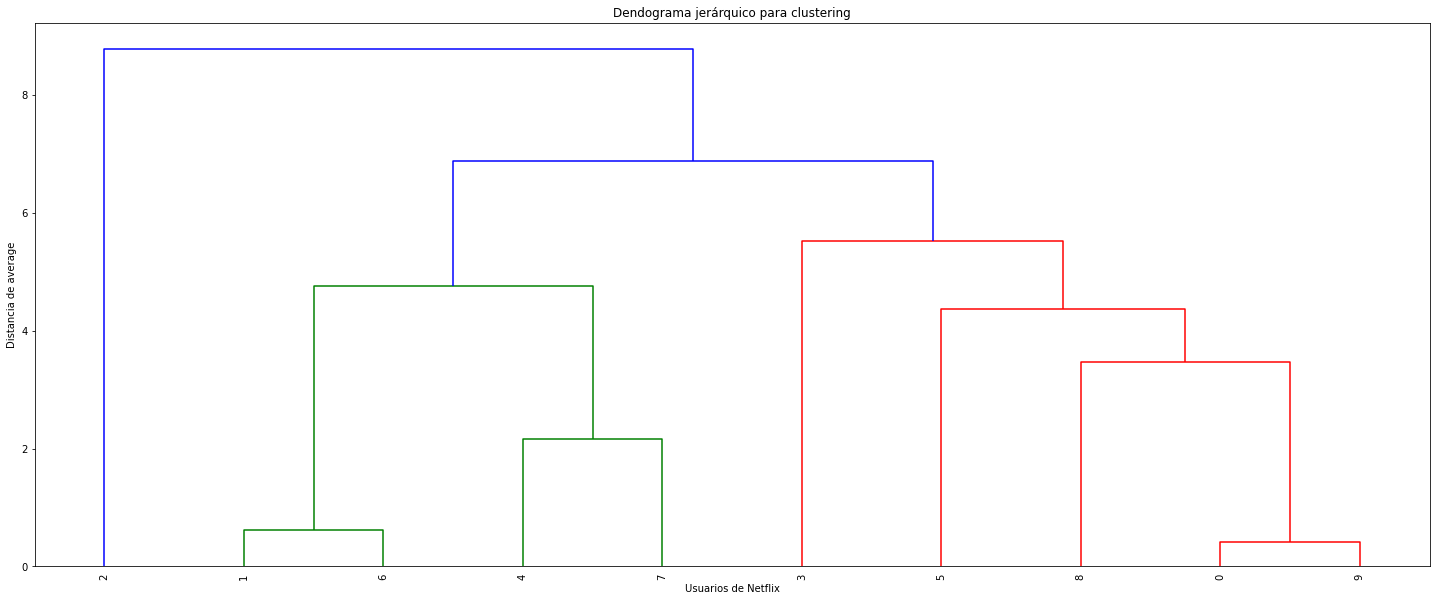

In [186]:
Z = linkage(data, "average")
plt.figure(figsize=(25, 10))
plt.title("Dendograma jerárquico para clustering")
plt.xlabel("Usuarios de Netflix")
plt.ylabel("Distancia de average")
dendrogram(Z, leaf_rotation=90, leaf_font_size=10.0)
plt.show()

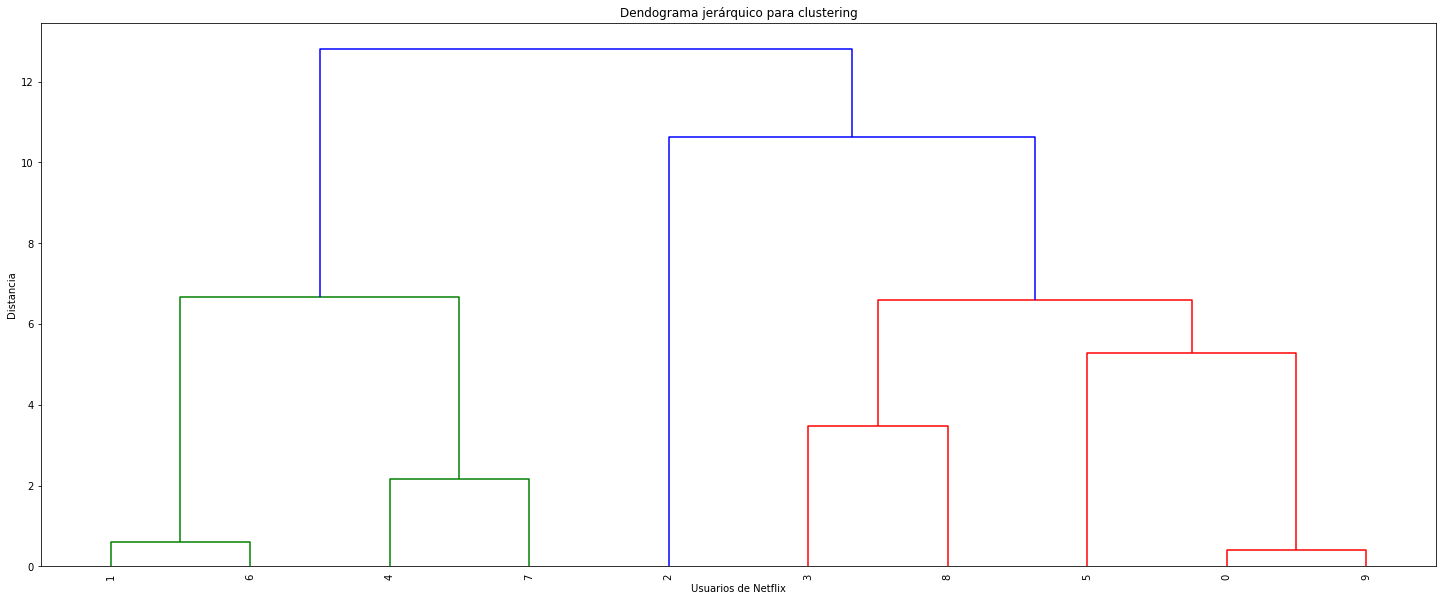

In [185]:
Z = linkage(data, "ward")
plt.figure(figsize=(25, 10))
plt.title("Dendograma jerárquico para clustering")
plt.xlabel("Usuarios de Netflix")
plt.ylabel("Distancia de ward")
dendrogram(Z, leaf_rotation=90, leaf_font_size=10.0)
plt.show()

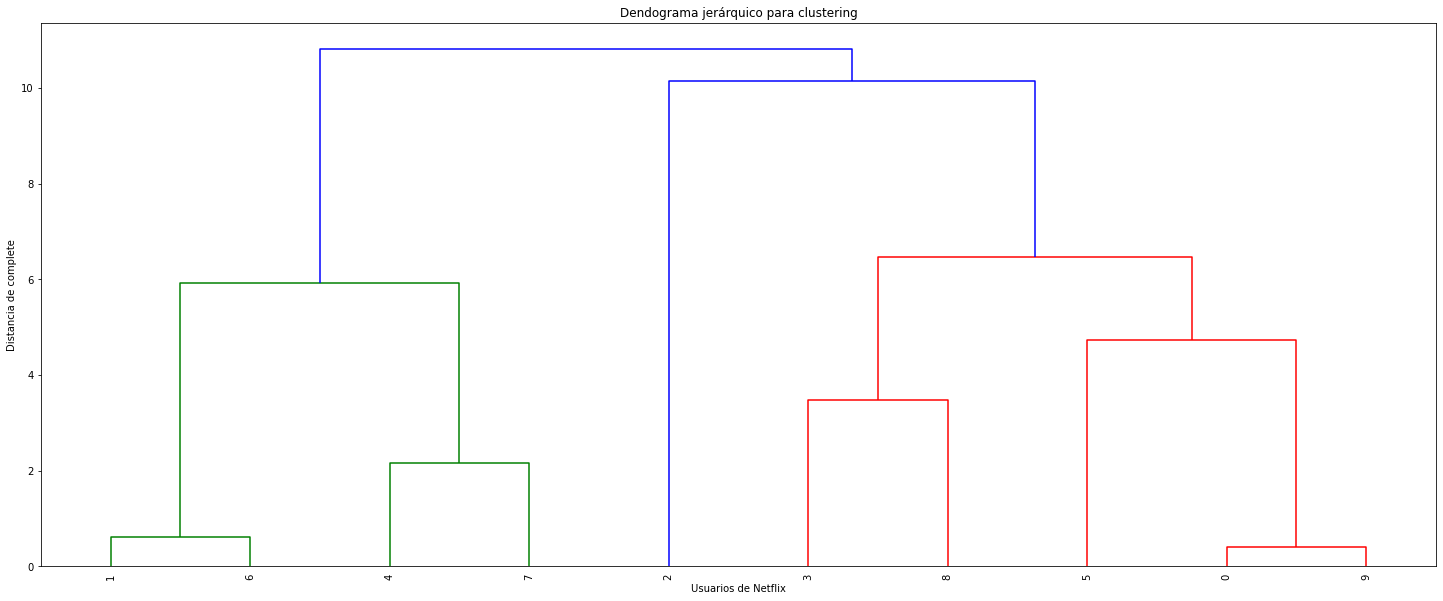

In [188]:
Z = linkage(data, "complete")
plt.figure(figsize=(25, 10))
plt.title("Dendograma jerárquico para clustering")
plt.xlabel("Usuarios de Netflix")
plt.ylabel("Distancia de complete")
dendrogram(Z, leaf_rotation=90, leaf_font_size=10.0)
plt.show()

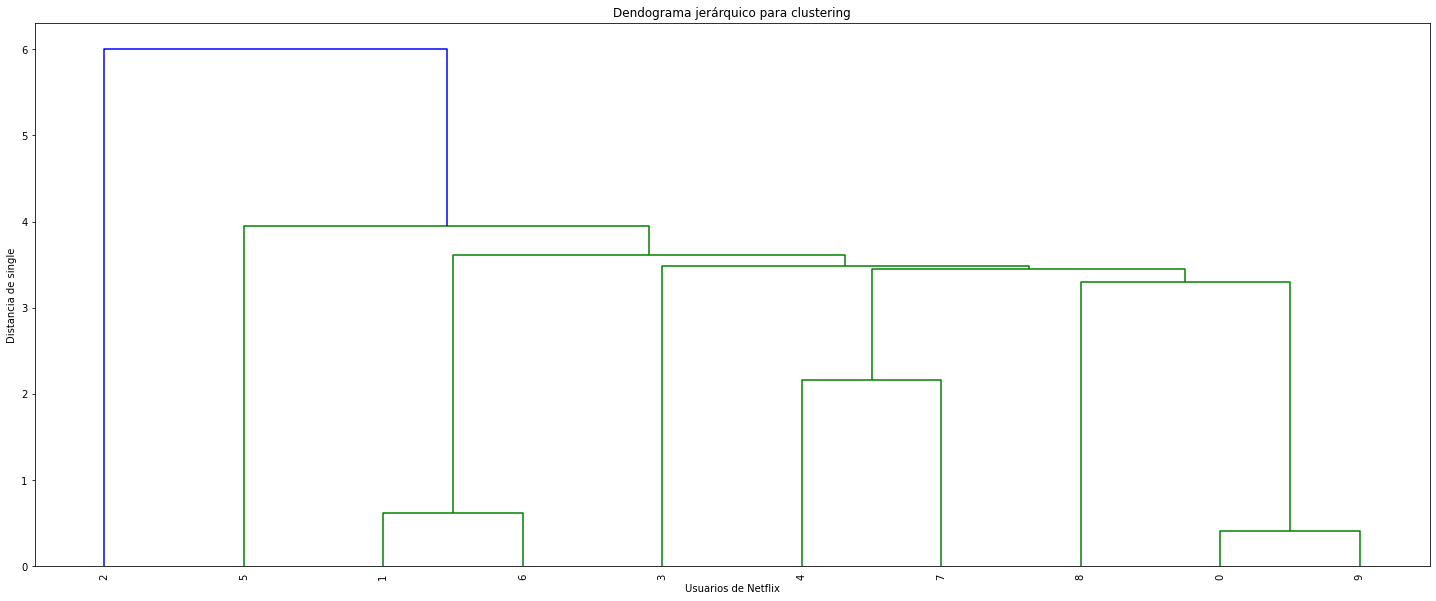

In [189]:
Z = linkage(data, "single")
plt.figure(figsize=(25, 10))
plt.title("Dendograma jerárquico para clustering")
plt.xlabel("Usuarios de Netflix")
plt.ylabel("Distancia de single")
dendrogram(Z, leaf_rotation=90, leaf_font_size=10.0)
plt.show()

In [187]:
data

star_wars  lord_of_the_rings  harry_potter
0        1.2                4.9           2.1
1        2.1                8.1           7.9
2        7.4                3.0           9.9
3        5.6                0.5           1.8
4        1.5                8.3           2.6
5        2.5                3.7           6.5
6        2.0                8.2           8.5
7        1.8                9.3           4.5
8        2.6                1.7           3.1
9        1.5                4.7           2.3